In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot

In [7]:
df = pd.read_csv('Train.csv')

# Soal 1

In [56]:
numerical   = ['Customer_care_calls','Cost_of_the_Product',
              'Prior_purchases','Discount_offered','Weight_in_gms']
categorical = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
categoricals = ['Customer_rating','Reached.on.Time_Y.N']
categorical_1 = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Customer_rating','Reached.on.Time_Y.N']

In [44]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [46]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [48]:
df[categorical].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


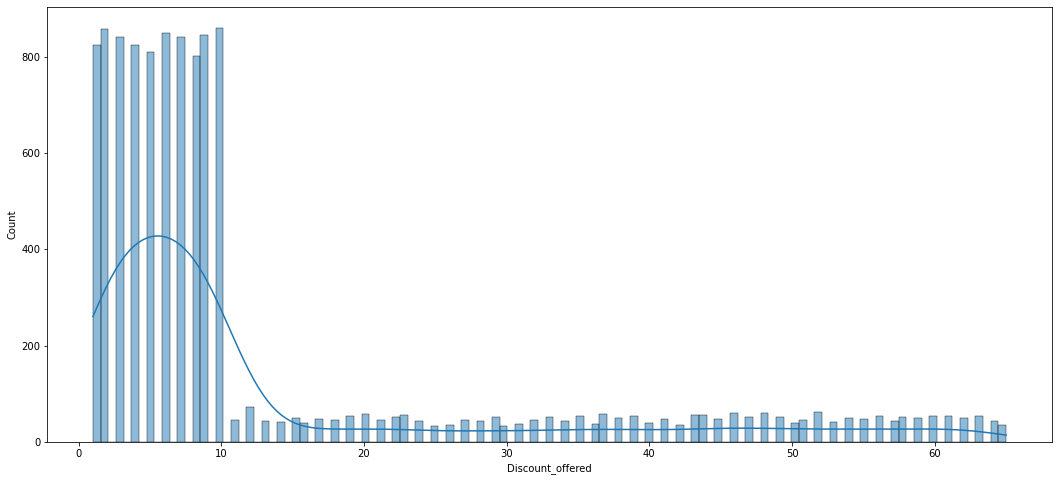

In [50]:
plt.figure(figsize=(18,8))
ax = sns.histplot(df, x='Discount_offered', linewidth=0.4, kde = True)

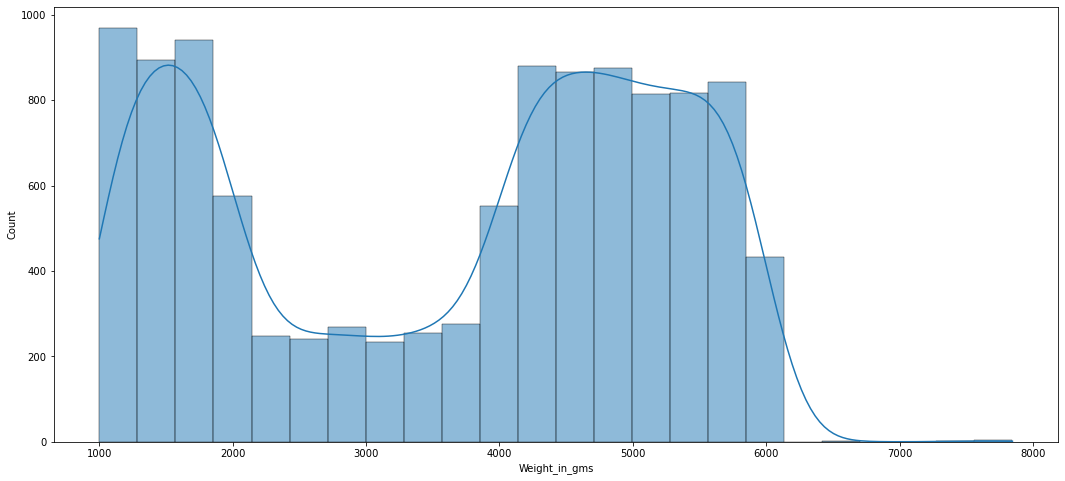

In [51]:
plt.figure(figsize=(18,8))
ax = sns.histplot(df, x='Weight_in_gms', linewidth=0.4, kde = True)

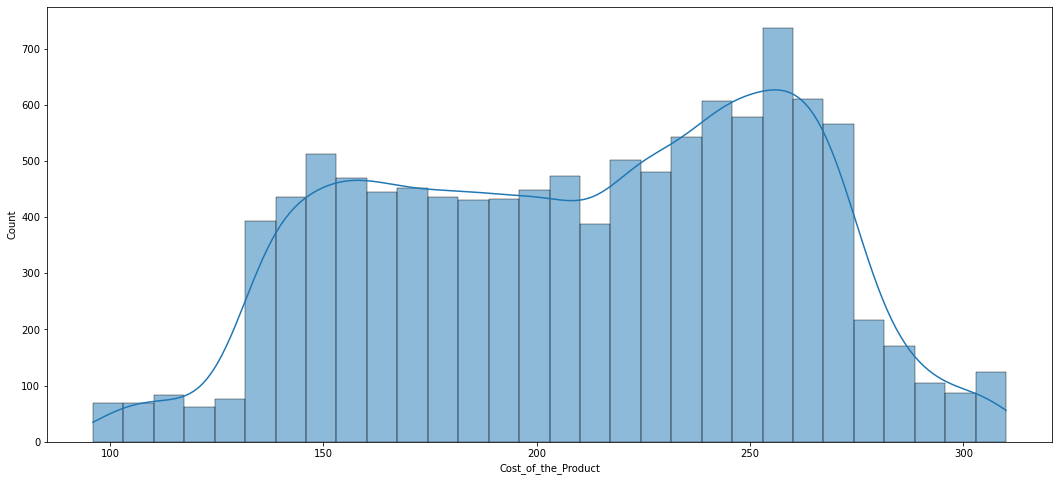

In [52]:
plt.figure(figsize=(18,8))
ax = sns.histplot(df, x='Cost_of_the_Product', linewidth=0.4, kde = True)

In [49]:
df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

# No 1 <br>

Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai? <br>
- Tidak ada, untuk isi dari tiap kolomnya sudah sesuai

Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
- Tidak ada, seluruh kolom tidak memiliki nilai kosong

Apakah ada kolom yang memiliki nilai summary agak aneh? <br>
- Pada kolom cost_of_product dan weight_in_gms membentuk Negatif Skewed karena nilai Median > mean 
- Pada kolom Discount_offered membetuk Positif skewed karena nilai Mean > median

Hasil pengamatan dan rekomendasi
- Pada kolom cost_of_product dan weight_in_gms membentuk Negatif Skewed sehingga harus dilakukan feautere transofrmasion agar nantinya menjadi Normal Skewed
- Pada kolom Discount_offered membentuk Positif skewed sehingga harus dilakukan feature transformation agar nantinya menjadi Normal Skewed
- Kolom ID memiliki banyak nilai Unique sehingga harus di drop

# No 2

## Numerical

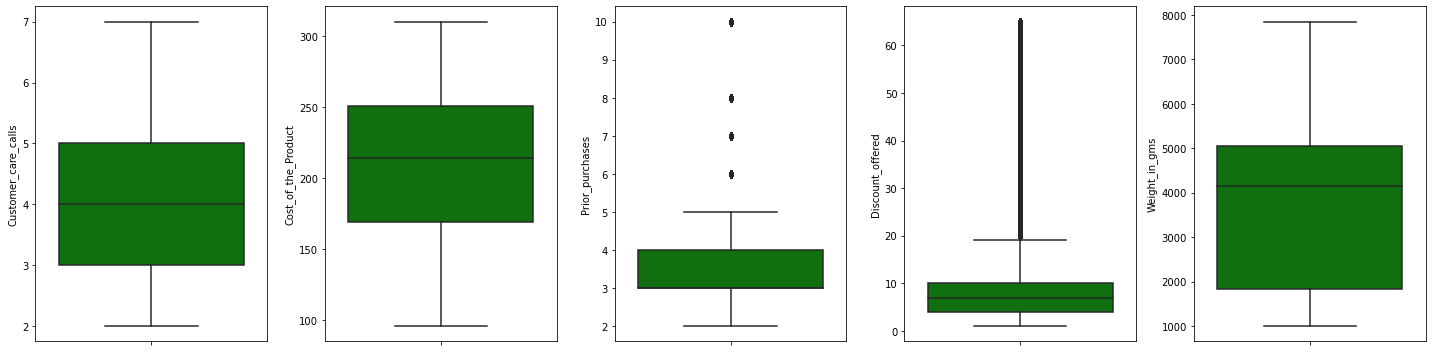

In [54]:
plt.figure(figsize=(20,5))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]], color='green', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier. <br>
* Outlier pada kolom prior purchases tidak perlu dibuang dikarenakan nilainya masih dalam batas wajar (kecuali ada nilai yang < 0 sehingga harus dilakukan drop pada kolom tersebut)
* Outlier pada kolom Discount offered tidak perlu dibuang dikarenakan discount yang diberikan masih dalam batas wajar

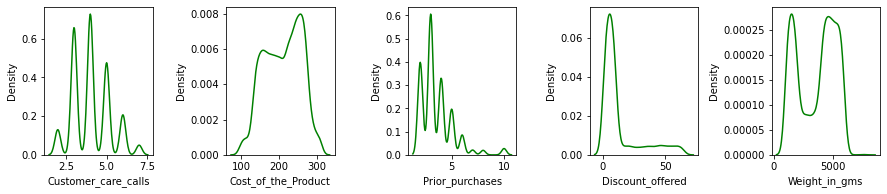

In [53]:
plt.figure(figsize=(20,5))
for i in range(0, len(numerical)):
    plt.subplot(2, 8, i+1)
    sns.kdeplot(x=df[numerical[i]], color='green')
    plt.xlabel(numerical[i])
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
- Pada kolom cost_of_product dan weight_in_gms membentuk grafik berbentuk bimodal sehingga harus di tranformasi agar nantinya berbentuk Normal skewed 
- Pada kolom customer_care_calls dan prior purchases membentuk grafik berbentuk multimodal sehingga harus dilakukan transofrmasi agar nantinya menjadi Normal Skewed
- Pada kolom Discount_offered membentuk Positif skewed sehingga harus dilakukan transformati agar nantinya menjadi Normal Skewed

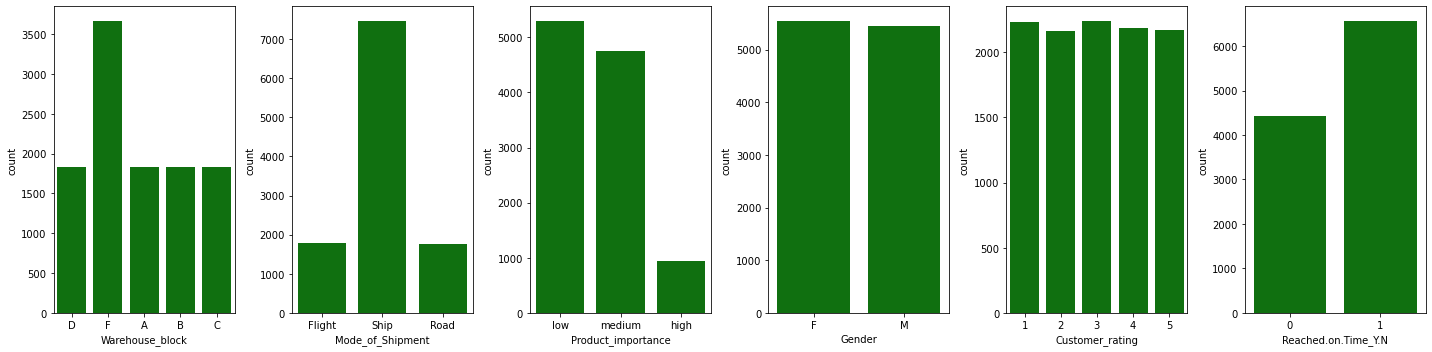

In [57]:
plt.figure(figsize=(20,5))
for i in range(0, len(categorical_1)):
    plt.subplot(1, len(categorical_1), i+1)
    sns.countplot(x=df[categorical_1[i]], color='green', orient='v')
    plt.tight_layout()

Terakhir kita lihat count plot untuk setiap data. 
- Data yang didapat dalam kolom categoricals masih dalam batas wajar karena tidak ada nilai yang mendominasi dan kategori dari tiap kolom tidak terlalu banyak sehingga feature masih bisa dipertahankan

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di follow up saat data preprocessing <br>

Hal yang harus dilakukan ketika preprocessing 
- Pada kolom cost_of_product dan weight_in_gms membentuk grafik berbentuk bimodal sehingga harus di tranformasi agar nantinya berbentuk Normal skewed 
- Pada kolom customer_care_calls dan prior purchases membentuk grafik berbentuk multimodal sehingga harus dilakukan transofrmasi agar nantinya menjadi Normal Skewed
- Pada kolom Discount_offered membentuk Positif skewed sehingga harus dilakukan transformati agar nantinya menjadi Normal Skewed

# Soal 3

In [11]:
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


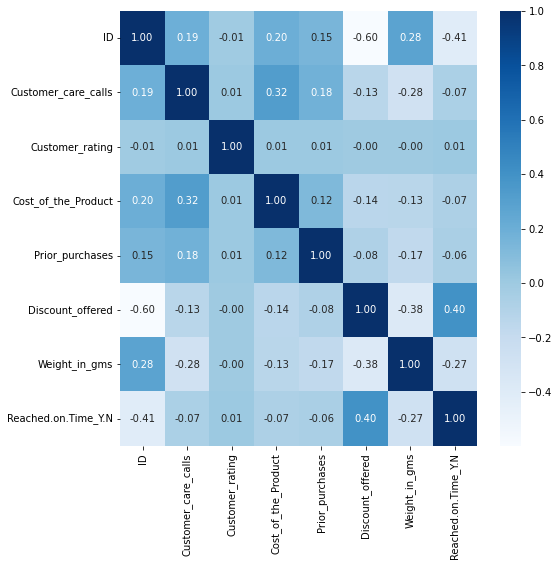

In [12]:
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

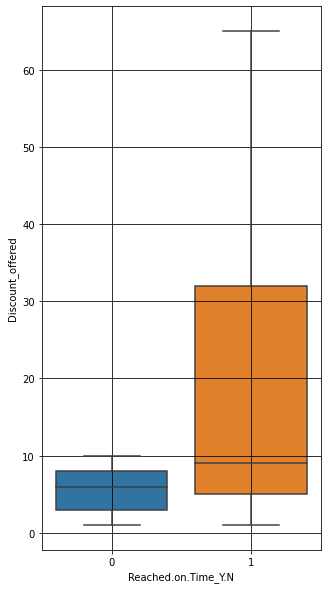

In [77]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df);
pyplot.grid(True,color='black')
plt.show()

<Figure size 864x576 with 0 Axes>

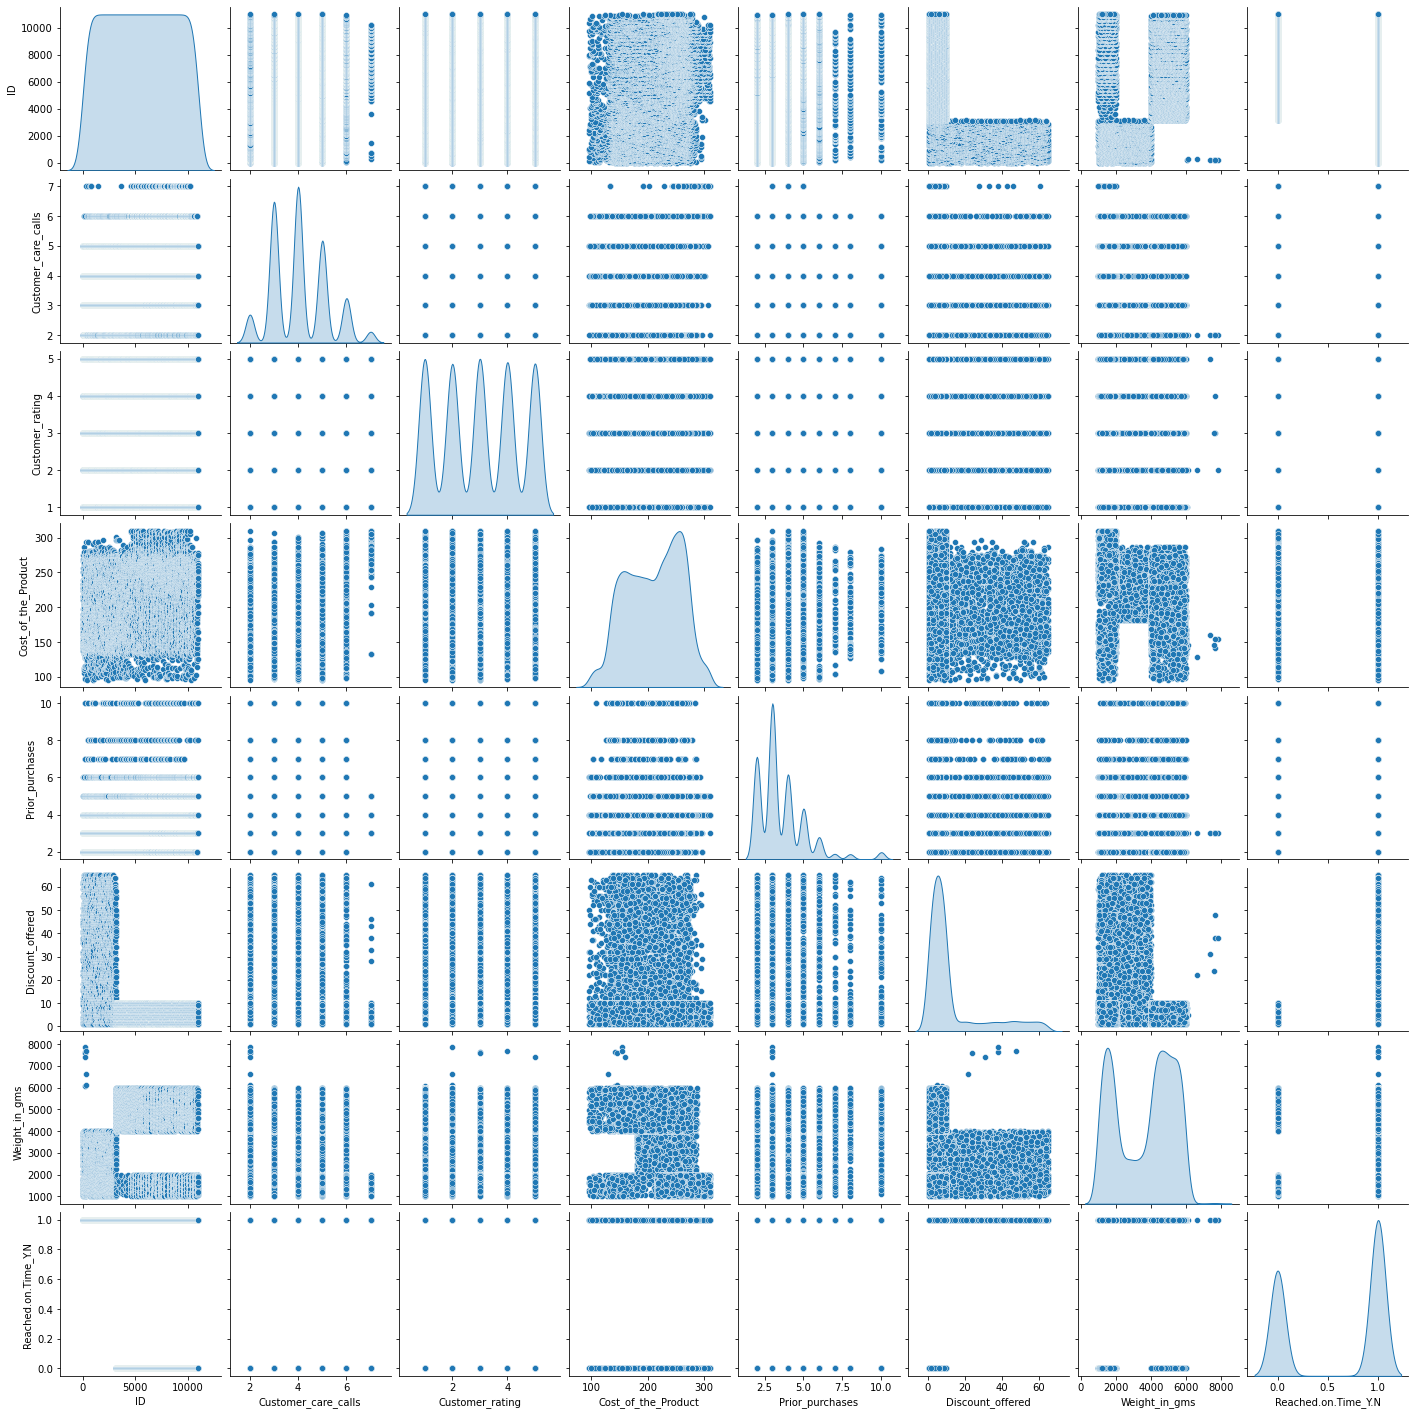

In [13]:
plt.figure(figsize=(12,8))
sns.pairplot(df, diag_kind='kde');

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan? <br>
- Korelasi dari kolom Reached.on.Time_Y.N dan Discount_offered menujukkan hubungan korelasi positif cukup kuat sehingga merupakan strong potential feature dan harus dipertahankan (Semakin banyak discount yang diberikan dapat menyebabkan keterlambatan dalam pengiriman paket)
- Korelasi dari kolom Weight_in_gms dan Reached.on.Time_Y.N menunjukkan hubungan korelasi negatif cukup kuat sehingga berpontensi menjadi potential feature
- Tidak ada fitur yang redundan dikarenakan nilai korelasi antar fitur tidak ada yang lebih besar dari 0.4
- Korelasi dari kolom Customer_rating, Weight_in_gms, dan Discount_offered sangat lemah, menandakan fitur tersebut tidak dapat dijadikan feature
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu? <br>
- Berdasakan grafik yang ditujukkan diatas kolom Reached.on.Time_Y.N dan Discount_offered menujukkan hubungan korelasi positif, kami telah melakukan visualisasi data yang menunjukkan bahwa semakin banyak diskon yang diberikan makan semakin banyak juga keterlambatan dalam pengiriman
* Tuliskan juga jika memang tidak ada feature yang saling berkorelas <br>

# Soal 4

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight.Tuliskan minimal 3 Insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

# Business Insight

In [41]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


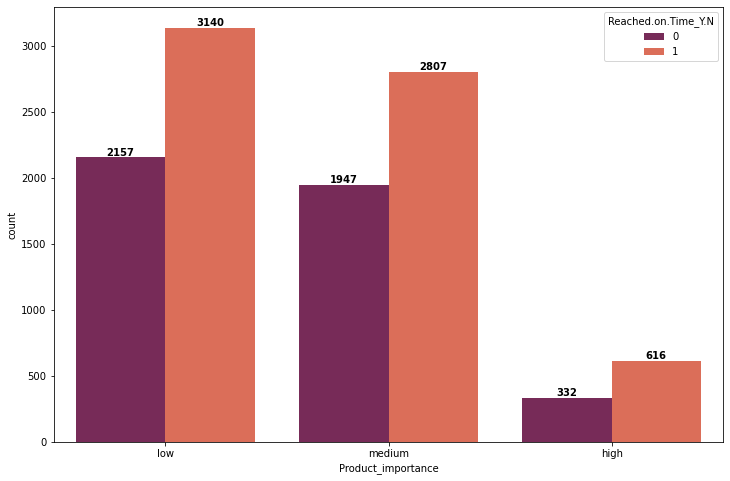

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot('Product_importance', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
for label in ax.containers: #Untuk bikin angka diatas bar
    ax.bar_label(label, fontweight='bold')
plt.show()

Untuk paket yang memiliki importance high banyak yang mengalami keterlambatan dalam pengiriman

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


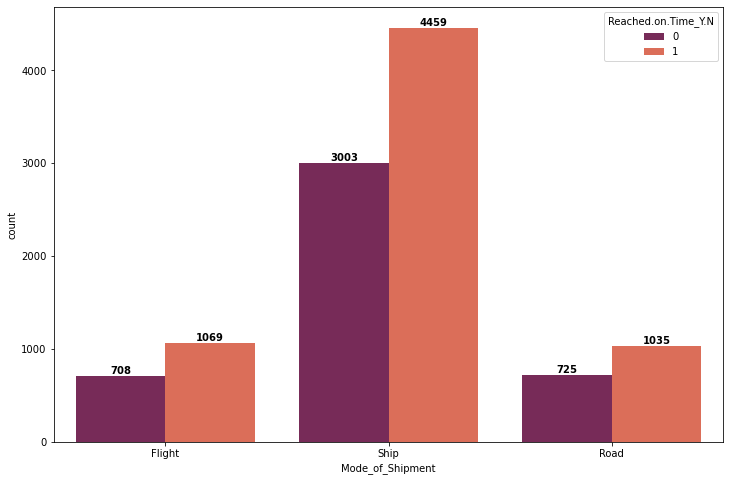

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot('Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
for label in ax.containers: #Untuk bikin angka diatas bar
    ax.bar_label(label, fontweight='bold')
plt.show()

- Pengiriman dengan kapal yang paling banyak mengalami keterlambatan dibandingkan dengan metode pengiriman yang lain

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


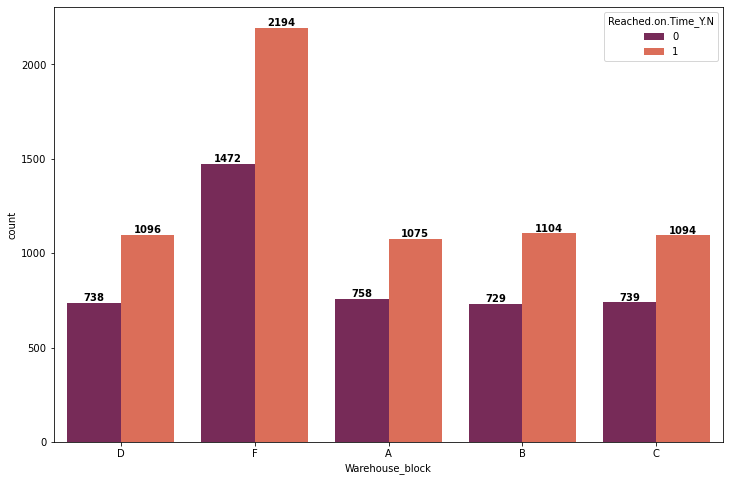

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot('Warehouse_block', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
for label in ax.containers: #Untuk bikin angka diatas bar
    ax.bar_label(label, fontweight='bold')
plt.show()

- Setiap warehouse sering mengalami keterlambatan dalam pengiriman, pada warehouse block f sering mengalami keterlambatan hal ini mungkin terjadi karena banyak metode pengiriman yang menggunakan kapal